In [20]:
__author__ = "Luke Rhinehart"
__version__ = "Fall 2023"
__pylint__ = "Version 3.11.4"

#Github repo is at https://github.com/0000LRhinehart/Project-3-Data-Analytics

In [21]:
'''Part 1
   intro'''
#Support Vector Machines
#Information from https://scikit-learn.org/stable/modules/svm.html#svm-classification
#https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

#Attempts to generate a hyperplane which seperates values with it. This is similar to a knn graph or cluster.
#This is able to be used for classification, regression and identifying outliers
#The hyperplanes are drawn an equal margin between values of one feature to another
#This margin generally has an amount of flexibility which can be changed.
#hard margins attempt to get as close as possible and soft margins can stray farther from it
#after the hyperplanes are drawn it attempts to find which separate the values the most properly

#In Sklearn, SVC using the linear kernel and linearSVC generate straight hyperplanes
#curved hyperplanes can be generate as well with RBF and polynomial kernel using SVS

#Positives
#Effective in high dimensional spaces
#Still effective when number of dimensions is larger than number of samples
#Memory effectient beacuse support vectors only use a subset of training points in the decision function 
#Capable of using multiple kernel functions 

#Negatives
#Can be slow and thus unsuitable for large datasets
#Is not capable of self-probablility estimates. Validation requires expensive cross validation


'Part 1\n   intro'

In [22]:
'''Part 2
   dataset introduction'''

#The dataset is sourced from https://www.kaggle.com/datasets/yekenot/tree-survival-prediction

#No is the id variable
#Plot is to the area the tree was planted in
#Subplot is the area in a specific plot where the tree was planted
#Species is the type of tree planted
#Light_ISF is the light as measured by HemiView software
#Light_CAT is the value found in Light_ISF put into one of three catagories, low, med or high
#Core is the year the soil core was removed
#Soil is the species of tree the soil was taken from
#Adult is the individual tree the soil was taken from
#Sterile is if the soil was steriled or not
#Conspecific is if the soil was conspecific, heterospecific, or sterile conspecific
#Myco is the Mycorrhizal type of the seedling. AMF or EMF
#SoilMyco is Mycorrhizal type of the tree the soil was taken from AMF, EMF or Sterile
#PlantDate is the calendar date of the tree was planter
#AMF is the percent of arbuscular mycorrhizal fungi colonization on the roots of the harvested seedling
#EMF is the percent of ectomycorrhizal fungi colonization on the roots of the harvested seedling
#Phenolics is the amount nmol Gallic acid equivalents per mg dry extract 
#Lignin is the percent of percent dry mass lignin 
#NSC is the percent of dry mass nonstructural carbohydrates 
#Census is census number at the time the seedling was planted
#Time is number of days between the planting of the tree and its harvest, death or end of the period
#Event is 0 if the tree is harvested or survived until the period was over and is the target
#Harvest is whether the tree was harvested for trait measurement or not
#Alive denotes alive trees with an X and NaN if dead


'Part 2\n   dataset introduction'

In [23]:
'''Part 2
   dataset import'''
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Tree_data.csv',)



display(df.dtypes)

No               int64
Plot             int64
Subplot         object
Species         object
Light_ISF      float64
Light_Cat       object
Core             int64
Soil            object
Adult           object
Sterile         object
Conspecific     object
Myco            object
SoilMyco        object
PlantDate       object
AMF            float64
EMF            float64
Phenolics      float64
Lignin         float64
NSC            float64
Census           int64
Time           float64
Event          float64
Harvest         object
Alive           object
dtype: object

In [24]:
'''Part 2 
   check for and drop null and uneeded values'''

print(df.isnull().sum()) #Check for null values

#Drop harvest, alive and the id feature as they are not needed or accurate to measure surviability. 
df_drop = df.drop(columns=['No','Harvest','Alive'])

df_drop = df_drop.dropna(subset='Event')

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64


In [25]:
'''Part 2
   dataset cleaning cont'''

# Converting categorical values into numerics
df_replace = df_drop

df_replace['Subplot'] = df_replace['Subplot'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4})
df_replace['Species'] = df_replace['Species'].replace({'Acer saccharum': 0, 'Prunus serotina': 1, 'Quercus alba': 2, 'Quercus rubra': 3})
df_replace['Light_Cat'] = df_replace['Light_Cat'].replace({'Low': 0, 'Med': 1, 'High': 2})
df_replace['Core'] = df_replace['Core'].replace({2016: 0, 2017: 1})
df_replace['Soil'] = df_replace['Soil'].replace({'Acer saccharum': 0, 'Prunus serotina': 1, 'Quercus alba': 2, 'Quercus rubra': 3,'Acer rubrum': 4, 'Populus grandidentata': 5, 'Sterile': 6})
df_replace['Sterile'] = df_replace['Sterile'].replace({'Sterile': 0, 'Non-Sterile': 1})
df_replace['Conspecific'] = df_replace['Conspecific'].replace({'Conspecific': 0, 'Heterospecific': 1, 'Sterilized': 2})
df_replace['Myco'] = df_replace['Myco'].replace({'AMF': 0, 'EMF': 1})
df_replace['SoilMyco'] = df_replace['SoilMyco'].replace({'AMF': 0, 'EMF': 1, 'Sterile': 2})


display(df_replace.head) #Verify that values were replaced properly

<bound method NDFrame.head of       Plot  Subplot  Species  Light_ISF  Light_Cat  Core  Soil Adult  Sterile  \
0        1        2        0      0.106          1     1     1     I        1   
1        1        2        2      0.106          1     1     3   970        1   
2        1        2        3      0.106          1     1     1     J        1   
3        7        3        0      0.080          1     0     1     J        1   
4       14        0        0      0.060          0     1     1   689        1   
...    ...      ...      ...        ...        ...   ...   ...   ...      ...   
2777    17        2        2      0.122          2     1     3  1595        1   
2778    17        1        1      0.111          1     1     5   891        1   
2779    17        3        2      0.118          1     1     4  1468        1   
2780    17        3        2      0.118          1     1     3  1454        1   
2782    18        0        1      0.141          2     0     5   118        1  

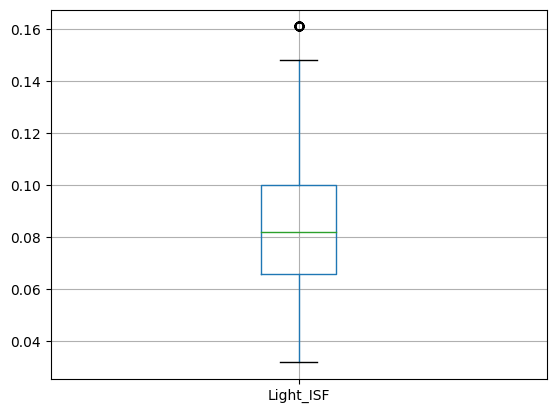

In [26]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

'''The no outlier dataframes are not used as they had negative effects on the data overall
   which indcluded removing some data overall such as Myco being reduced to only EMF'''

df_replace.boxplot(column=['Light_ISF'])
plt.show()

df_light_nooutlier = df_replace[(df_replace['Light_ISF'] < 0.15 ) ]

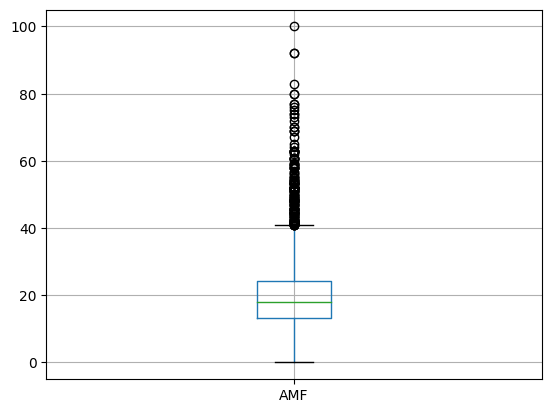

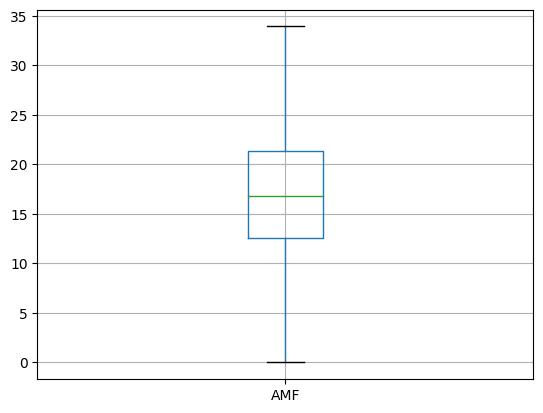

In [27]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

df_light_nooutlier.boxplot(column=['AMF'])
plt.show()

df_AMF_nooutlier = df_light_nooutlier[(df_light_nooutlier['AMF'] < 34 ) ]

df_AMF_nooutlier.boxplot(column=['AMF'])
plt.show()

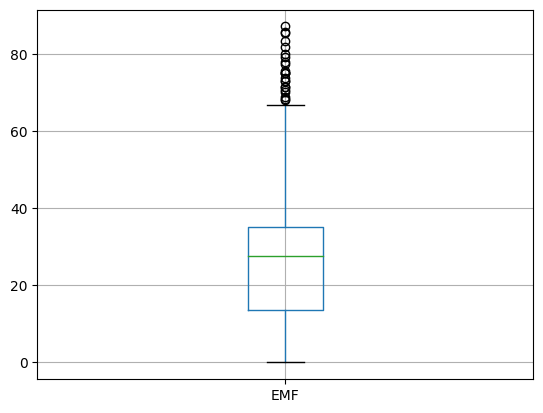

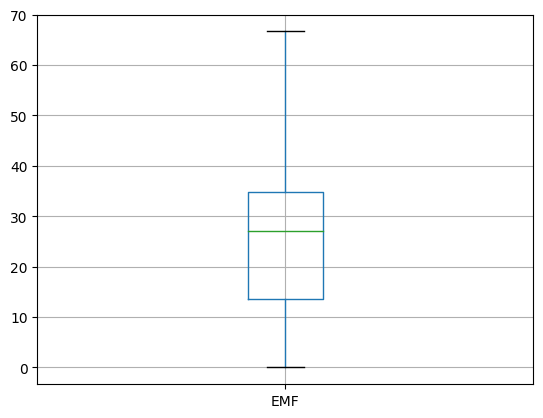

In [28]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

df_AMF_nooutlier.boxplot(column=['EMF'])
plt.show()

df_EMF_nooutlier = df_AMF_nooutlier[(df_AMF_nooutlier['EMF'] < 67 ) ]

df_EMF_nooutlier.boxplot(column=['EMF'])
plt.show()

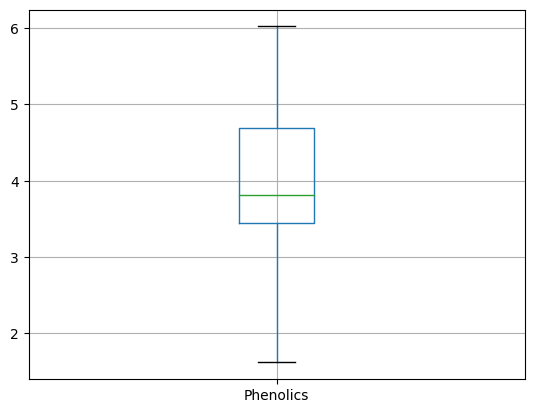

In [29]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

df_EMF_nooutlier.boxplot(column=['Phenolics']) # no outliers
plt.show()

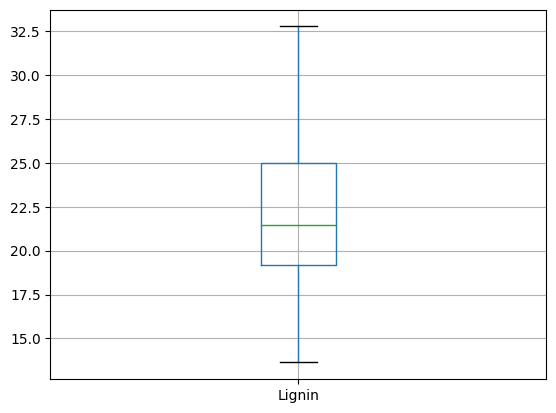

In [30]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

df_EMF_nooutlier.boxplot(column=['Lignin']) # no outliers
plt.show()

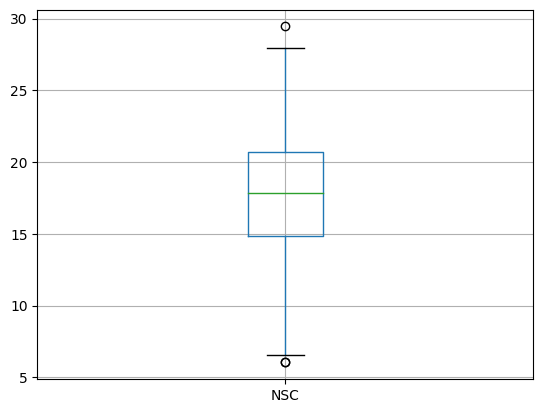

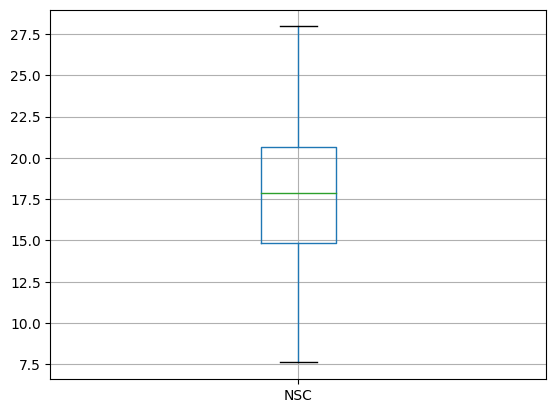

In [31]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

df_EMF_nooutlier.boxplot(column=['NSC'])
plt.show()

df_NSC_nooutlier = df_EMF_nooutlier[(df_EMF_nooutlier['NSC'] < 28 ) & (df_EMF_nooutlier['NSC'] > 7 )]

df_NSC_nooutlier.boxplot(column=['NSC'])
plt.show()

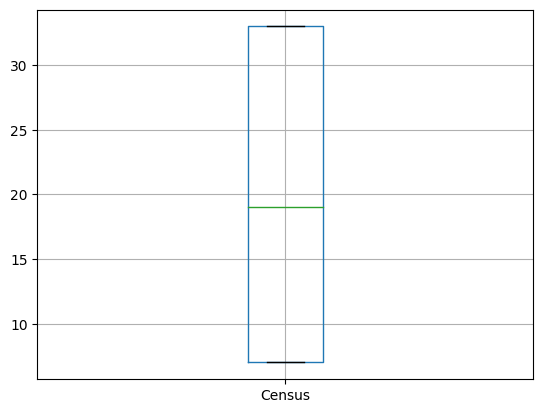

In [32]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

df_NSC_nooutlier.boxplot(column=['Census']) #no outliers
plt.show()

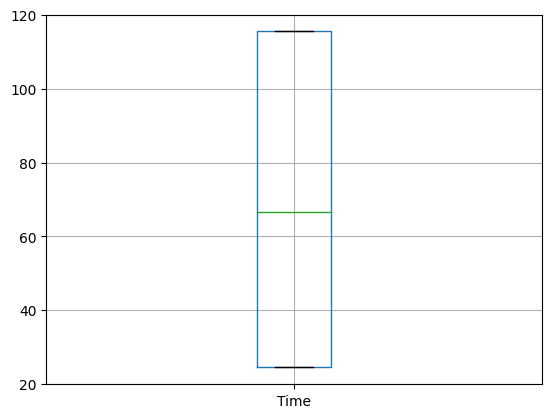

In [33]:
'''Part 2
   dataset cleaning cont
   removing outliers'''

df_NSC_nooutlier.boxplot(column=['Time'])  #no outliers
plt.show()

df_nooutlier_final = df_NSC_nooutlier

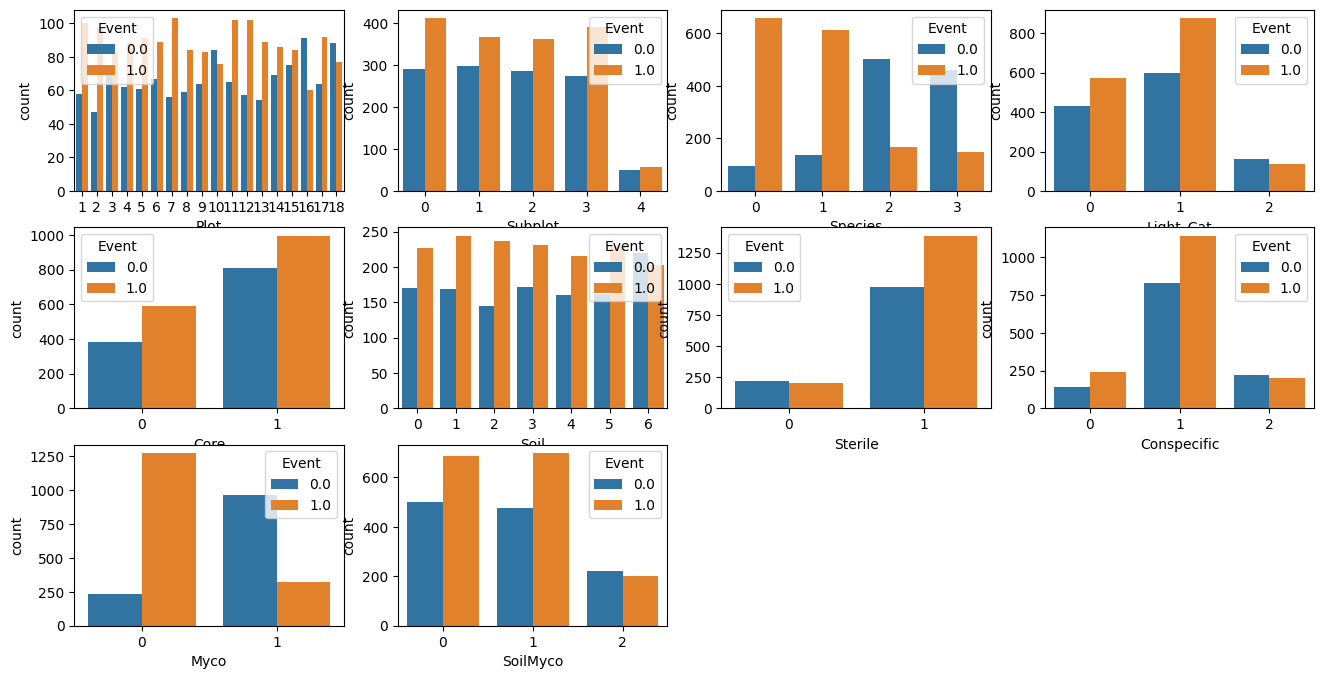

In [34]:
'''Part 2
   Categorical Features vs. Target -
   Grouped Bar Chart or Stacked Bar Chart'''

cat_list=['Plot','Subplot','Species', 'Light_Cat','Core', 'Soil','Sterile','Conspecific','Myco','SoilMyco']

fig=plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(3,4,i+1)
    chart=sns.countplot(x=column,hue='Event', data=df_replace)

plt.show()
#Subplot appears to be somewhat uniform and species appears to be uniform accross 0 and 1 and 2 and 3
#SoilMyco appears to be uniform along 0 and 1

In [35]:
'''Part 2
   ANOVA'''
from sklearn.feature_selection import SelectKBest, f_classif, chi2

#EMF omitted as it contains NaN and it will be later removed 
x = df_drop.loc[:, ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Census','Time']]
y = df_drop.loc[:, 'Event']

fs = SelectKBest(score_func=f_classif, k='all') # call the method
bestFeatures = fs.fit(x, y) # train the model
np.set_printoptions(suppress = True)
print(bestFeatures.scores_) # print out the scores
print(bestFeatures.pvalues_)

#No p values are not above 5% and near alls f values are considerably high.  no values need to be removed

[   6.54723148   51.25195055 1377.6512245  1028.37888537  561.99897531
  158.46961789  158.46961789]
[0.01055728 0.         0.         0.         0.         0.
 0.        ]


In [37]:
'''Part 2
   Chi Squared'''

x = df_replace.loc[:, ['Plot','Subplot','Species', 'Light_Cat','Core', 'Soil','Sterile','Conspecific','Myco','SoilMyco']]
y = df_replace.loc[:, 'Event']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)

print(catFeatures.scores_)
print(catFeatures.pvalues_)

#The p values for Subplot, Light_Cat, Soil, Sterile

df_drop_chi = df_replace.drop(columns=['Subplot', 'Light_Cat', 'Core', 'Sterile'])

[ 39.3685643    0.01839994 733.82515306   2.07776326   2.7172988
   9.39545802   2.5940463    5.30713636 543.82048769   4.89011305]
[0.         0.89210085 0.         0.14945905 0.09926587 0.00217524
 0.10726599 0.02123824 0.         0.02701092]


In [38]:
'''Part 2
   Correlation'''

print(df_drop_chi.corr())

#Species has high correlation with Myco, Phenolics and Lignin
#EMF has high correlation with Phenolics and Myco and moderate corrlation with Species, lingin and NSC 
#Myco has high correlation with Phenolics, Lignin, NSC
#NSC has high correlation with Myco and Phenolics
#Census and Time have 1:1 correlation

df_drop_corr = df_drop_chi.drop(columns=['Myco', 'Lignin','EMF', 'NSC', 'Census'])

                 Plot   Species  Light_ISF      Soil  Conspecific      Myco  \
Plot         1.000000  0.016744   0.247019 -0.002722    -0.015022  0.014542   
Species      0.016744  1.000000   0.002243  0.005372     0.026716  0.891831   
Light_ISF    0.247019  0.002243   1.000000 -0.014761    -0.020316  0.003763   
Soil        -0.002722  0.005372  -0.014761  1.000000     0.623355  0.008220   
Conspecific -0.015022  0.026716  -0.020316  0.623355     1.000000  0.031334   
Myco         0.014542  0.891831   0.003763  0.008220     0.031334  1.000000   
SoilMyco    -0.005970  0.020353  -0.013463  0.731727     0.608786  0.020411   
AMF          0.084170 -0.033760   0.099582 -0.292115    -0.271979 -0.235674   
EMF          0.165424 -0.024734   0.164273 -0.329808    -0.479315       NaN   
Phenolics    0.038257  0.823448   0.097449 -0.047555    -0.049903  0.942318   
Lignin      -0.009993  0.765214   0.080870 -0.039085    -0.024006  0.884615   
NSC          0.026108  0.499075   0.226416 -0.030158

C:\Users\Rhino\AppData\Local\Temp\ipykernel_24828\4021435401.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_drop_chi.corr())


In [39]:
'''Part 2
   algorithm application'''
from sklearn.model_selection import train_test_split

X = df_drop_corr.loc[:, ['Plot','Species','Light_ISF','Soil','Conspecific','SoilMyco','AMF','Phenolics']]
y = df_drop_corr.loc[:, 'Event']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [57]:
'''Part 2
   algorithm application'''
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [58]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8047904191616766


In [63]:

clf_rbf = svm.SVC(kernel='rbf')

clf_rbf.fit(X_train, y_train)

y_pred_rbf = clf_polynomial.predict(X_test)

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

#The rbf kernel provided a 2.8 increase in accuracy.

Accuracy: 0.8323353293413174


In [42]:
clf.support_vectors_

array([[10.   ,  1.   ,  0.072, ...,  0.   , 36.12 ,  0.42 ],
       [10.   ,  1.   ,  0.072, ...,  0.   , 32.   ,  0.52 ],
       [ 6.   ,  2.   ,  0.091, ...,  0.   , 13.96 ,  4.23 ],
       ...,
       [ 2.   ,  1.   ,  0.097, ...,  1.   , 36.14 ,  0.71 ],
       [17.   ,  1.   ,  0.111, ...,  1.   , 40.89 ,  0.83 ],
       [ 2.   ,  2.   ,  0.1  , ...,  1.   , 15.82 ,  4.97 ]])

In [43]:
clf.support_

array([   4,   13,   19,   20,   24,   25,   26,   27,   29,   30,   34,
         41,   49,   51,   52,   53,   56,   58,   69,   74,   76,   83,
         96,   99,  106,  107,  111,  113,  116,  126,  129,  130,  133,
        134,  138,  139,  151,  156,  157,  159,  164,  169,  177,  181,
        182,  191,  192,  193,  194,  204,  205,  206,  213,  220,  224,
        227,  228,  230,  231,  238,  239,  240,  241,  243,  247,  249,
        250,  269,  271,  272,  273,  278,  282,  283,  285,  288,  293,
        297,  298,  299,  303,  304,  305,  310,  314,  320,  323,  325,
        336,  348,  351,  354,  355,  356,  358,  368,  370,  372,  373,
        376,  377,  381,  399,  401,  407,  412,  415,  418,  422,  428,
        430,  431,  434,  436,  439,  456,  461,  480,  497,  500,  507,
        517,  520,  527,  530,  531,  547,  550,  551,  555,  557,  561,
        565,  572,  573,  580,  581,  586,  587,  593,  596,  605,  609,
        613,  614,  617,  618,  619,  622,  627,  6

In [44]:
clf.n_support_

array([436, 438])

In [45]:
dec = clf.decision_function(X)
dec.shape[0]

2782

In [46]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function(X)
dec.shape[0] # 4 classes

2782

In [47]:
'''Part 2
   other algorithms'''

#feature scaling

x_final = df_replace.loc[:, ['Light_ISF', 'SoilMyco']]

from sklearn.preprocessing import MinMaxScaler

nor_x= MinMaxScaler()

x_scaled= nor_x.fit_transform(x_final)

In [48]:
'''Part 2
   knn Classification'''
from sklearn.neighbors import KNeighborsClassifier

classifier= KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2 )

classifier.fit(x_scaled, y)

KNeighborsClassifier(n_neighbors=1)

In [49]:
'''Part 2
   cross validation for knn Classification'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier= KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

y_predicted = classifier.predict(X_test)
accuracy_score(y_test, y_predicted)

#Accuracy of the knn result is ~2% less than that of Linear SVM and 

0.7844311377245509

In [50]:
'''Part 2
   Decision trees'''
#balance the training data
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0) # call the method
oversampled_x,oversampled_y=os.fit_resample(X_train, y_train)

print(X_train.shape)
print(oversampled_x.shape)

(1947, 8)
(2212, 8)


In [51]:
'''Part 2
   Decision trees'''
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf2 = tree.DecisionTreeClassifier(max_depth=3) # 3 is the tree depth.

clf2.fit(oversampled_x,oversampled_y)
clf2.score(X_test,y_test)

#Accuracy score for the decision tree is ~2% higher than that of the SVM with linear and .6% lower than SVM with rbf

0.8263473053892215

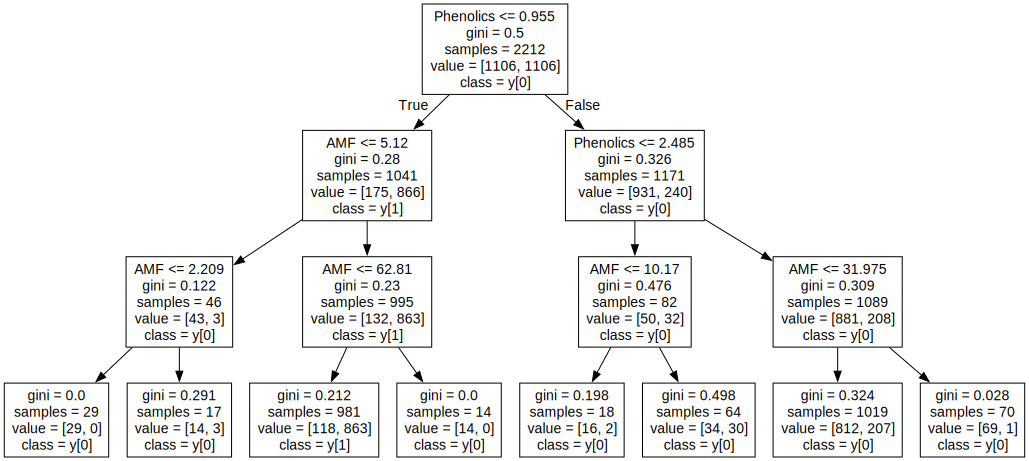

In [52]:
'''Part 2
   Decision trees: visual'''
import graphviz

dot_data = tree.export_graphviz(clf2,
feature_names=['Plot','Species','Light_ISF','Core','Conspecific','SoilMyco','AMF','Phenolics'],
class_names = True)

graph = graphviz.Source(dot_data)
graph.render("gini")
graph

In [ ]:
'''Part 3
   video'''

#filler

In [66]:
'''Part 4
   Deployment'''
import pickle
from pickle import dump

dump(clf_rbf, open("model.pkl", "wb"))




In [ ]:
#https://scikit-learn.org/stable/modules/sgd.html#classification
